# Function Approximation using Neural Networks

## Approximating Non-linear Functions
Imagine a tool so versatile that it can learn to recognize patterns, make decisions, and even mimic human-like reasoning. This tool isn’t a product of science fiction, but a reality in the world of computer science known as a [**neural network**](https://en.wikipedia.org/wiki/Neural_network_(machine_learning)). At its core, a neural network is inspired by the intricate web of neurons in our brains, but instead of processing thoughts and memories, it processes data and learns patterns.

As [**universal function approximators**](https://en.wikipedia.org/wiki/Universal_approximation_theorem), neural networks combine linear transformations with non-linear activation functions, gaining the ability to approximate any continuous function. This powerful combination allows them to model intricate patterns and relationships in data, making them a cornerstone of deep learning.

But why is this capability so significant? In the vast realm of data-driven tasks, from voice recognition to predicting weather patterns, the underlying relationships are often complex and non-linear. Traditional linear models fall short in capturing these intricacies. Neural networks, with their layered architecture and non-linear activation functions, rise to the challenge, offering a flexible and powerful approach to model these relationships.

Let’s use a simple example to illustrate the power of combining linear and non-linear layers.

Suppose we want to approximate the function $f(x)=x^{2}$ using a neural network. This is a simple non-linear function. If we use only linear layers, our network won’t be able to approximate this function well. But by introducing non-linearity, we can achieve a good approximation.

## 1. Using only Linear Layers

Let's first try to approximate $f(x)=x^{2}$ using only linear layers.

**Creating the data:**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn

# seed for reproducibility
torch.manual_seed(42)

# create data
x = torch.unsqueeze(torch.linspace(-2, 2, 1000), dim=1)
y = x.pow(2)

**Visualizing the data for the function $f(x)=x^{2}$:**

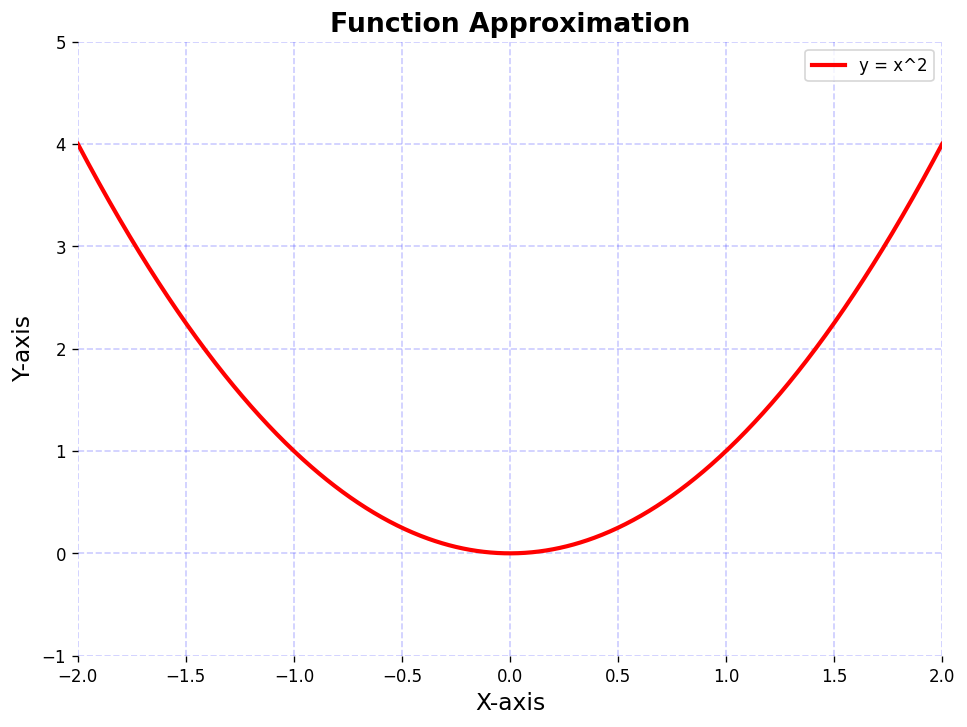

In [3]:
from implicitnet.plotting import plot_function

plot_function(x, y)

**Defining the linear neural network:**

In [4]:
# linear model with one hidden layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

**Training the neural network:**

In [5]:
# train the model
linear_model = LinearModel(input_dim=1, hidden_dim=20, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.01)

losses, preds = [], []
training_epochs = 100
for epoch in range(training_epochs + 1):
    outputs = linear_model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    preds.append(linear_model(x).detach().numpy())

# model predictions
final_pred = linear_model(x).detach().numpy()

**Model predictions:**

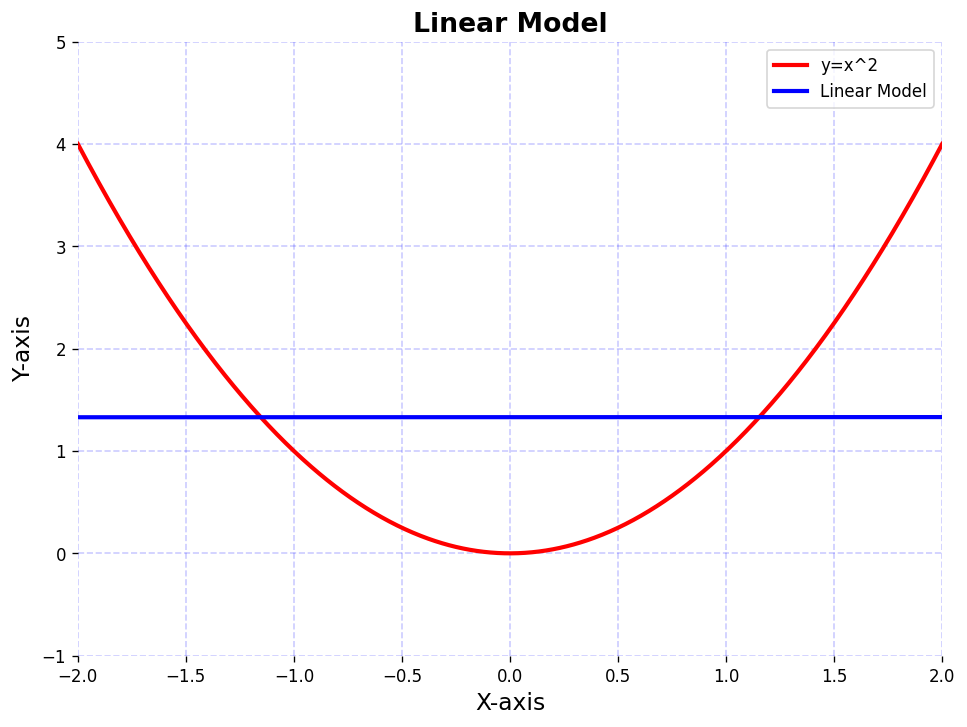

In [6]:
from implicitnet.plotting import plot_model

plot_model(x=x, y=y, predicted=final_pred)

**Creating the visual animation:**

In [7]:
from implicitnet.plotting import plot_animation

predictions = {}
n_iters = list(range(0, 101))
for epoch in n_iters:
    predictions[epoch] = preds[epoch]

plot_animation(
    x=x,
    y=y,
    preds=predictions,
    file_name="linear",
    folder_name="linear_plots",
)

In [8]:
from implicitnet.plotting import create_gif

create_gif(folder_name="linear_plots", file_name="linear", n_iters=n_iters)

**Visualizing the learning process:**

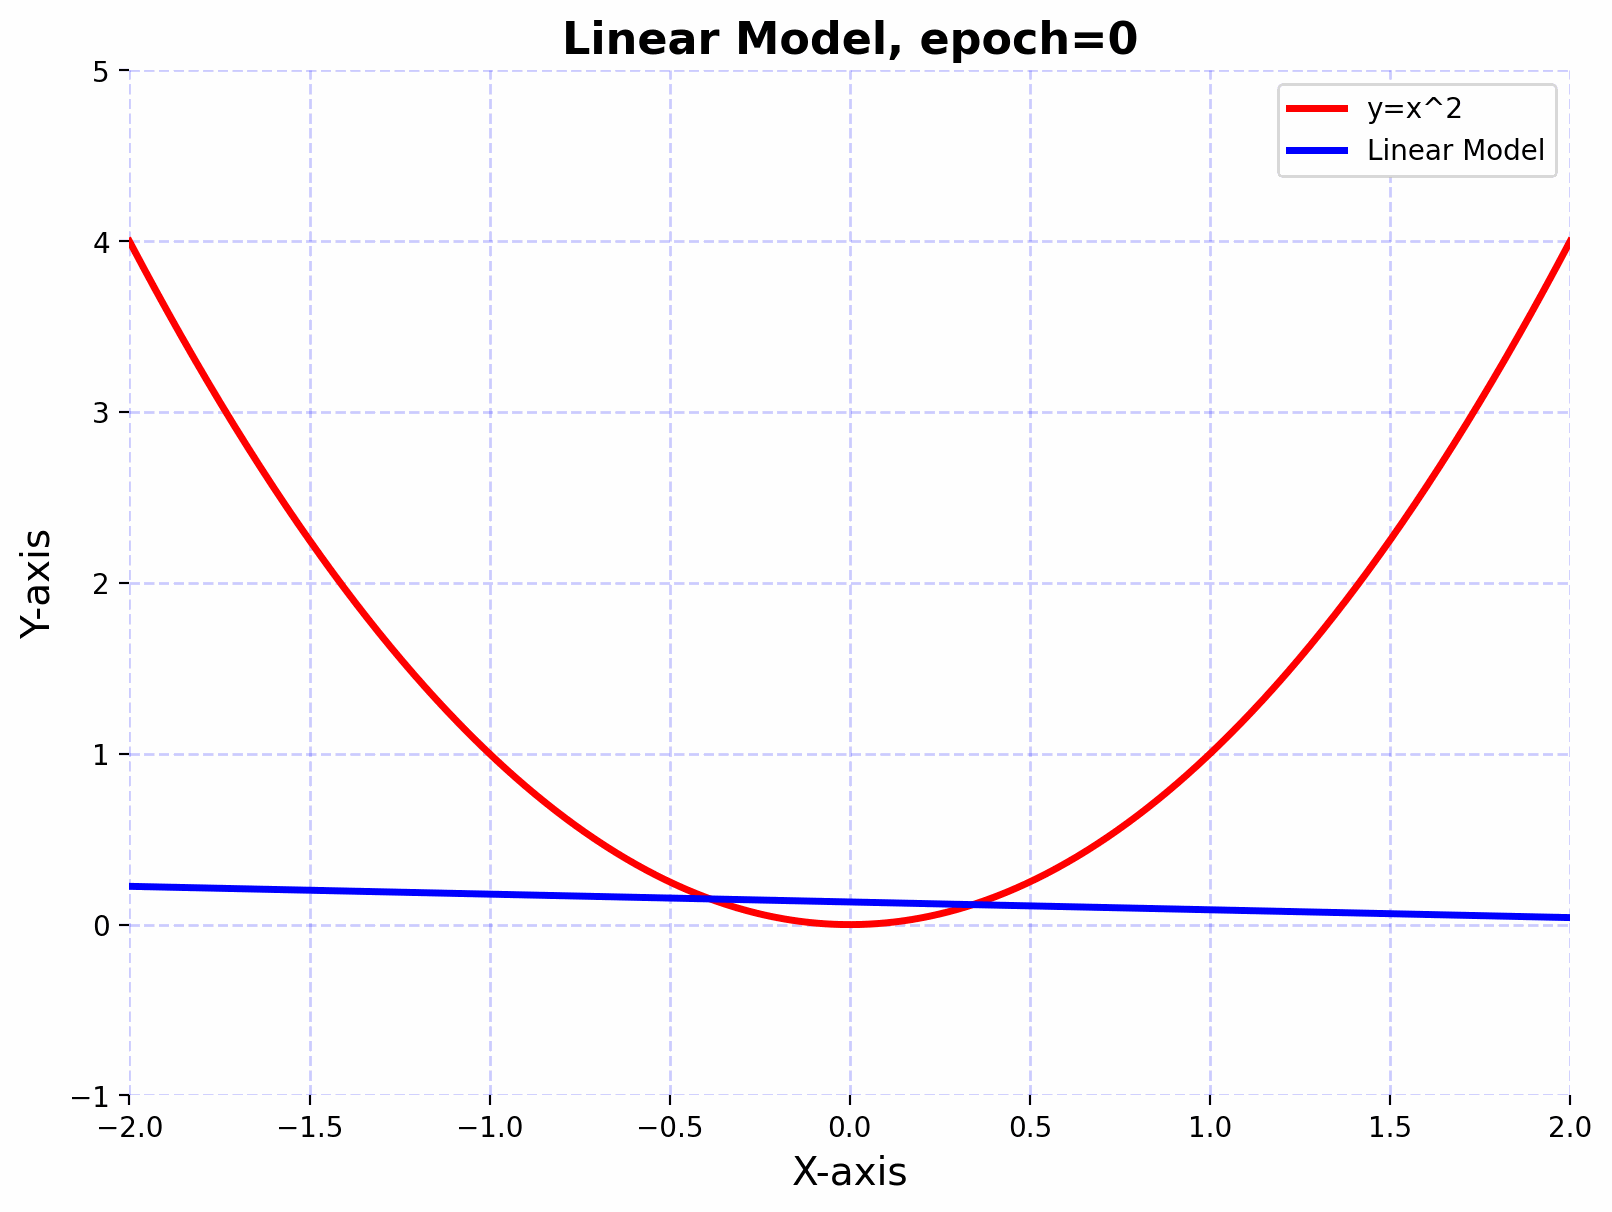

In [9]:
from IPython.display import Image

Image(filename="../animations/linear_animation.gif")

We observe that the linear model doesn’t approximate the function $f(x)=x^{2}$ well, even after 100 epochs.
This is because linear transformations are great for scaling, rotating, and translating data. 
However, no matter how many linear layers we stack together, the final transformation will always be linear.
This means that the expressive power of the network remains limited.

## 2. Introducing Non-linearity

Now, let’s introduce a non-linear activation function ([**ReLU**](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))) between the linear layers. These non-linearities allow the network to model complex, non-linear relationships in the data.

**Defining the Non-linear network:**

In [10]:
# define a non-linear model with ReLU activation
class NonLinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        hidden = self.fc1(x)
        relu = torch.relu(hidden)
        output = self.fc2(relu)
        return output

**Training the non-linear model:**

In [16]:
nonlinear_model = NonLinearModel(input_dim=1, hidden_dim=20, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(nonlinear_model.parameters(), lr=0.01)

losses, preds = [], []
training_epochs = 1000
for epoch in range(training_epochs + 1):
    outputs = nonlinear_model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    preds.append(nonlinear_model(x).detach().numpy())

# model predictions
nonlinear_pred = nonlinear_model(x).detach().numpy()

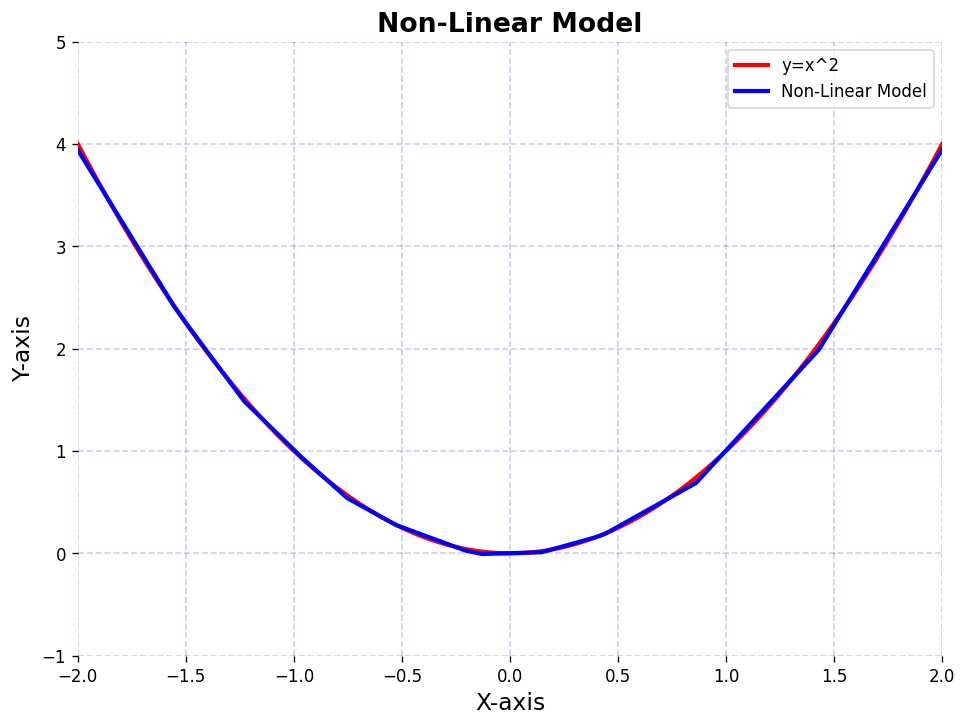

In [37]:
plot_model(x=x, y=y, predicted=nonlinear_pred, title="Non-Linear Model")

In [38]:
predictions = {}
n_iters = list(range(0, 50))
n_iters += list(range(50, 100, 2))
n_iters += list(range(100, 300, 5))
n_iters += list(range(300, 1001, 20))
for epoch in n_iters:
    predictions[epoch] = preds[epoch]

file_name = "nonlinear"
folder_name = "nonlinear_plots"
plot_animation(
    x=x,
    y=y,
    preds=predictions,
    file_name=file_name,
    folder_name=folder_name,
    model_name="Non-Linear Model",
)

In [39]:
from implicitnet.plotting import create_gif

create_gif(folder_name=folder_name, file_name=file_name, n_iters=n_iters)

In [40]:
Image(filename="../animations/nonlinear_animation.gif")